In [1]:
import os
import pathlib
import pickle
from time import time

import CATCH_utils

import numpy as np
import matplotlib.pyplot as plt

# Loading Polygons

In [24]:
bp = '/Users/dietrichhadler/Desktop/Daten/test/data/Segm1/177-lvma/1.2.276.0.7230010.3.1.2.2984217738.4584.1586945896.16647'
paths = pathlib.Path(bp).glob('*.pickle')
pickles = [pickle.load(open(str(p), 'rb')) for p in paths if 'case' not in str(p)]
print(len(pickles))
a = pickles[1]
print(a.keys())
lv_poly = a['lv_myo']['cont'][0]

26
dict_keys(['info', 'lv_myo', 'lv_epi', 'lv_pamu', 'lv_endo'])


# Cont2Mask Testing

## Speed Testing cont2mask

old cont2mask takes:  0.041295766830444336
cv2 geo2mask takes:  0.0107879638671875


/Users/dietrichhadler/Desktop/CATCH_utils.py:29: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  return list(geo)
/Users/dietrichhadler/Desktop/CATCH_utils.py:29: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return list(geo)


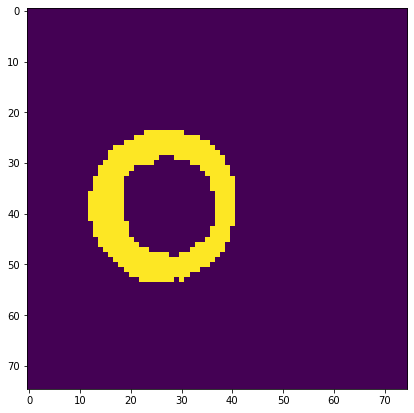

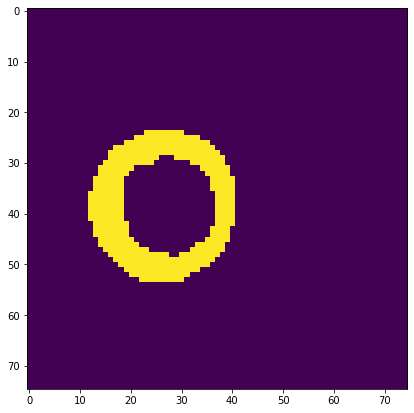

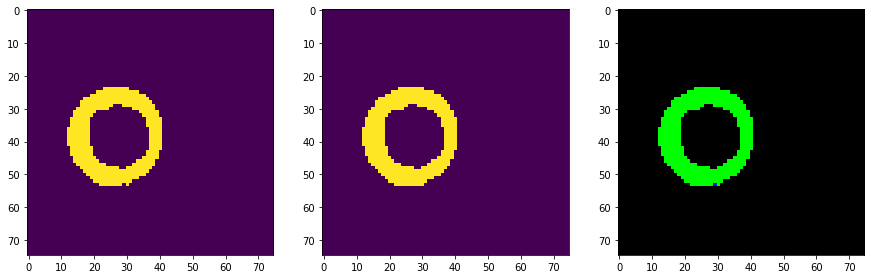

mask1:  408 int32 /nmask2:  409 int32
abs diff:  1 [-1  0]


In [3]:
mask1 = CATCH_utils.old_cont2mask([lv_poly], 200, 200, res=8)[50:125,50:125].astype(np.int32)
mask2 = CATCH_utils.geo2mask([lv_poly], 200, 200, res=8, debug=True)[50:125,50:125].astype(np.int32)

CATCH_utils.plot_mask(mask1); plt.show()
CATCH_utils.plot_mask(mask2); plt.show()
CATCH_utils.plot_mask_comparison(mask1, mask2); plt.show()

print('mask1: ', np.sum(mask1), mask1.dtype, '/nmask2: ', np.sum(mask2), mask2.dtype)
print('abs diff: ', np.sum(np.abs(mask1-mask2)), np.unique(mask1-mask2))

## Include Exclude cont2mask method

cv2 inc.exc. takes:  0.01578497886657715
cv2 inc.exc. takes:  0.005524873733520508
cv2 inc.exc. takes:  0.006040811538696289


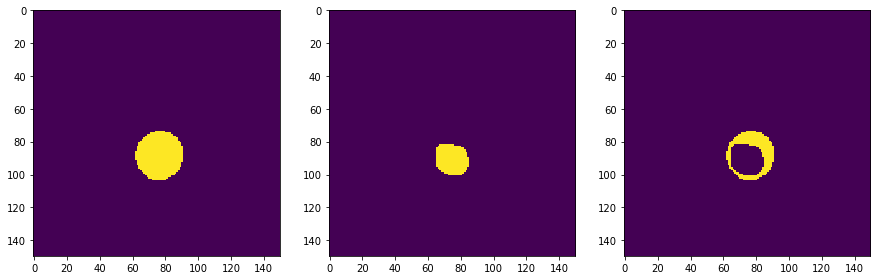

In [4]:
a, b = pickles[1], pickles[4]
lv_poly1, lv_poly2 = a['lv_myo']['cont'][0], b['lv_myo']['cont'][0]
#lv_poly1 = CATCH_utils.simplify_geometry(lv_poly1)

mask1    = CATCH_utils.geo2mask_include_exclude(lv_poly1, [],       150, 150, res=8, debug=True)
mask2    = CATCH_utils.geo2mask_include_exclude(lv_poly2, [],       150, 150, res=8, debug=True)
mask_bla = CATCH_utils.geo2mask_include_exclude(lv_poly1, lv_poly2, 150, 150, res=8, debug=True)

CATCH_utils.plot_masks([mask1, mask2, mask_bla]); plt.show()

# Useful functions, Simplify & Bouding Box

In [5]:
print(CATCH_utils.bounding_box(lv_poly1))

(61.75, 73.5, 90.75, 103.75)


# Polygon Metrics
## Hausdorff Distance

HD Distance:  5.126524163602469


/Users/dietrichhadler/Desktop/CATCH_utils.py:22: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  geo = MultiPolygon([g for g in geo if g.area])


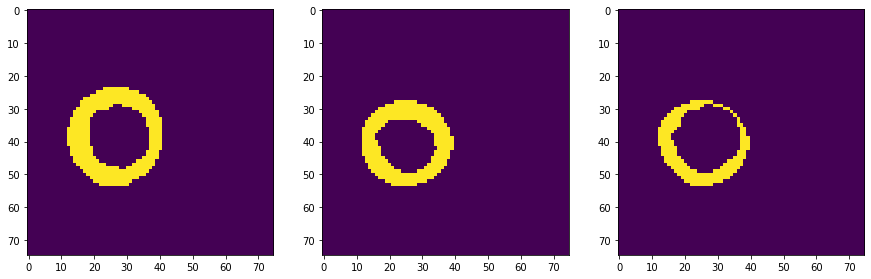

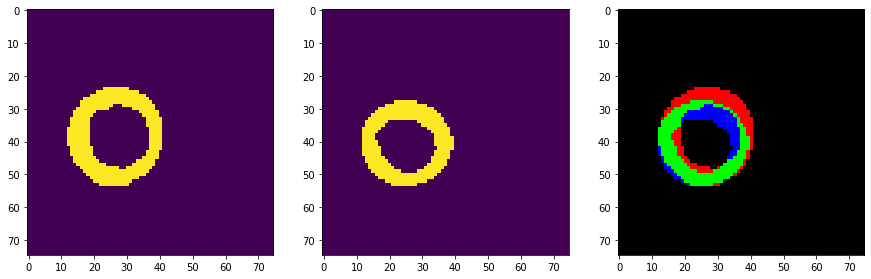

In [6]:
poly1, poly2 = pickles[1]['lv_myo']['cont'][0], pickles[9]['lv_myo']['cont'][0]
#poly2 = pickles[4]['lv_myo']['cont'][0]

mask1 = CATCH_utils.geo2mask([poly1], 200, 200, res=8)[50:125,50:125].astype(np.int32)
mask2 = CATCH_utils.geo2mask([poly2], 200, 200, res=8)[50:125,50:125].astype(np.int32)
overlap = mask1.astype(np.bool8) & mask2.astype(np.bool8)
print('HD Distance: ', CATCH_utils.hausdorff(poly1, poly2))

CATCH_utils.plot_masks([mask1, mask2, overlap])
CATCH_utils.plot_mask_comparison(mask1, mask2)

## Dice Tests  - Speed, Accuracy, Average Surface Distance

In [7]:
print('Dice = ', CATCH_utils.mask_dice(poly1, poly2, True))
print('Dice = ', CATCH_utils.dice(poly1, poly2, True))
print ("\nFor more complex Shapely objects:")
multi1 = poly1.difference(poly2)
multi2 = poly1.intersection(poly2)
print('Dice = ', CATCH_utils.dice(multi1, multi2))
print('Dice = ', CATCH_utils.dice(poly1, multi2))
print('\nASD is: ', CATCH_utils.mask_asd(poly1, poly2, 1, 1, debug=True))

Mask dice took:  0.05907320976257324
Dice =  0.6236842105263158
Dice took:  0.0030608177185058594
Dice =  0.6217297117147143

For more complex Shapely objects:
Dice =  0.0
Dice =  0.7293876154635648
Mask ASD took:  0.02793288230895996

ASD is:  1.3727978920627124


# Transforming Geometric Objects for Plotting

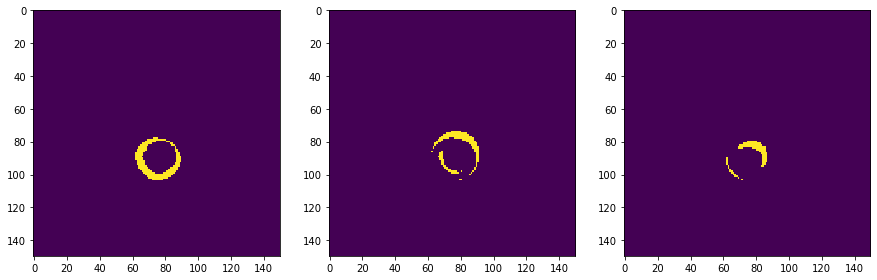

In plot geo face:  MultiPolygon
In plot geo face:  MultiPolygon
In plot geo face:  MultiPolygon


/Users/dietrichhadler/opt/anaconda3/lib/python3.8/site-packages/descartes/patch.py:46: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  polygon = [Polygon(p) for p in polygon]
/Users/dietrichhadler/opt/anaconda3/lib/python3.8/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/Users/dietrichhadler/opt/anaconda3/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


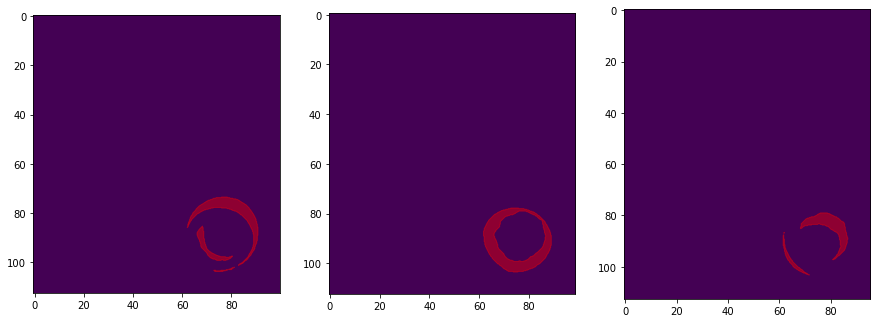

In [8]:
# Converted to plot function below
agreed, diff1, diff2 = CATCH_utils.get_geometry_comparison(poly1, poly2)
agreed_mask = CATCH_utils.geo2mask(agreed, 150, 150, res=8)
diff1_mask  = CATCH_utils.geo2mask(diff1,  150, 150, res=8)
diff2_mask  = CATCH_utils.geo2mask(diff2,  150, 150, res=8)

# Mask visualization
CATCH_utils.plot_masks([agreed_mask, diff1_mask, diff2_mask])
fig, axes = plt.subplots(1,3,figsize=(15,15))
CATCH_utils.plot_geo_face(agreed, ax=axes[1])
CATCH_utils.plot_geo_face(diff1,  ax=axes[0])
CATCH_utils.plot_geo_face(diff2,  ax=axes[2])

# Plotting

In plot geo face:  MultiPolygon


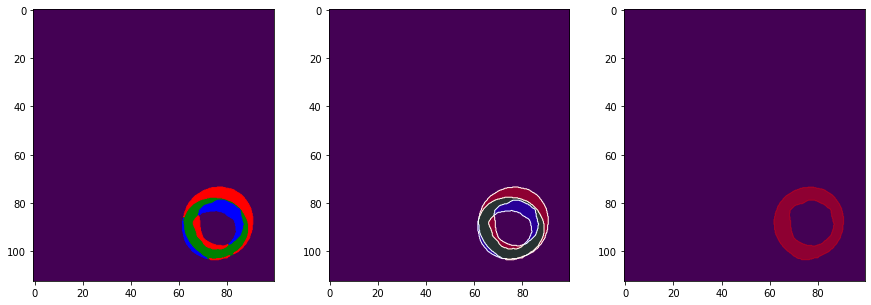

In [10]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
CATCH_utils.plot_geo_face_comparison(poly1, poly2, img=None, ax=axes[0], alpha=1.0)
CATCH_utils.plot_geo_face_comparison(poly1, poly2, img=None, ax=axes[1])
CATCH_utils.plot_outlines(axes[1], poly1)
CATCH_utils.plot_outlines(axes[1], poly2)
CATCH_utils.plot_geo_face(poly1, img=None, ax=axes[2], c='r')
plt.show()

## Comparison Mask Contour Plot

cv2 geo2mask takes:  0.02338409423828125
cv2 geo2mask takes:  0.013733863830566406
In plot geo face:  MultiPolygon
In plot geo face:  MultiPolygon


(50.0, 125.0)

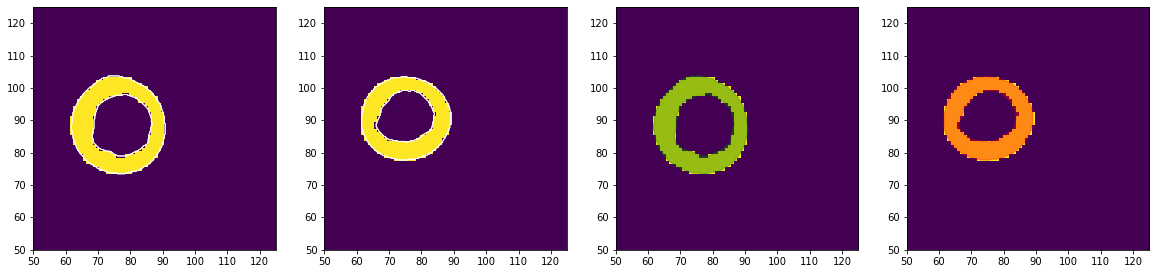

In [21]:
mask1 = CATCH_utils.geo2mask([poly1], 200, 200, res=8, debug=True).astype(np.int32)
mask2 = CATCH_utils.geo2mask([poly2], 200, 200, res=8, debug=True).astype(np.int32)

fig, axes = plt.subplots(1,4,figsize=(20,7))
axes[0].imshow(mask1)
axes[1].imshow(mask2)
CATCH_utils.plot_outlines(axes[0], poly1)
CATCH_utils.plot_outlines(axes[1], poly2)
axes[0].set_xlim(50,125); axes[0].set_ylim(50,125)
axes[1].set_xlim(50,125); axes[1].set_ylim(50,125)

CATCH_utils.plot_outlines(axes[0], poly1)
CATCH_utils.plot_outlines(axes[1], poly2)
CATCH_utils.plot_geo_face(poly1, img=mask1, ax=axes[2], c='g')
CATCH_utils.plot_geo_face(poly2, img=mask2, ax=axes[3], c='r')
axes[0].set_xlim(50,125); axes[0].set_ylim(50,125)
axes[1].set_xlim(50,125); axes[1].set_ylim(50,125)
axes[2].set_xlim(50,125); axes[2].set_ylim(50,125)
axes[3].set_xlim(50,125); axes[3].set_ylim(50,125)

## find contours

In [ ]:
# convert back and forth

# Testing RV Cases

In [ ]:
def get_cnames(anno): return [k for k in anno.keys() if k!='info']
for i in range(6):
    print('CASE ', i+1)
    bp = '/Users/dietrichhadler/Desktop/Daten/test/data/rvs/case'+str(i+1)+'.pickle'
    case = pickle.load(open(bp, 'rb'))
    annos = [case[k] for k in case.keys()]
    for anno in annos:
        fig, axes = plt.subplots(1,2,figsize=(15,10))
        img = np.zeros((150,150))
        for c_i, c in enumerate(get_cnames(anno)):
            CATCH_utils.plot_outlines( anno[c]['cont'], img=img, ax=axes[0])
            CATCH_utils.plot_geo_face(anno[c]['cont'], img=img, ax=axes[1], c=['r','g','y','w'][c_i])
        plt.show()

## Computing random overlaps and Dice Metrics

In [ ]:
all_annos = []
for i in range(6):
    bp = '/Users/dietrichhadler/Desktop/Daten/test/data/rvs/case'+str(i+1)+'.pickle'
    case = pickle.load(open(bp, 'rb'))
    all_annos.extend([case[k] for k in case.keys()])
for anno1 in all_annos:
    for anno2 in all_annos:
        cnames = list(set(get_cnames(anno1)) & set(get_cnames(anno2)))
        for c in cnames:
            #if c=='rv_epi': continue
            print(anno1[c]['contType'], anno1[c]['cont'].geom_type)
            fig, axes = plt.subplots(1,1,figsize=(10,10))
            img = np.zeros((150,150))
            print('Dice: ', CATCH_utils.dice(anno1[c]['cont'], anno2[c]['cont']))
            CATCH_utils.plot_geo_face_comparison(anno1[c]['cont'], anno2[c]['cont'], img=img, ax=axes)
            axes.set_xlim(20,150); axes.set_ylim(20,150); plt.show()

In [ ]:
import cv2

masks = []
print("Myocardial mask: ")
masks.append(CATCH_utils.geo2mask([poly2], 150, 150, res=8, debug=True).astype(np.uint8))
print(np.sum(masks[-1]))

print("Morph close:")
se1 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
masks.append(cv2.morphologyEx(myo_mask, cv2.MORPH_CLOSE, se1))
print(np.sum(masks[-1]))

print("Fuzzy")
rand = np.random.choice([1,0], size=150**2, p=[0.1, 0.9]).reshape(150,150)
fuzzy = np.copy(masks[0])
fuzzy[np.where(rand==1)] = 0
masks.append(fuzzy)
print(np.sum(masks[-1]))

print("Morph close:")
se1 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
masks.append(cv2.morphologyEx(masks[-1], cv2.MORPH_CLOSE, se1))
print(np.sum(masks[-1]))

for m in masks:
    CATCH_utils.plot_mask(m); plt.show()